pip install aquirdturtle_collapsible_headings

In [118]:
import pandas as pd
import json
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats

# **First steps**

## Questions:

What data in rotten_tomatoes_movies data is useful for a successful business?<br>
Does the audience review data have a correlation with budget?<br>
Does the production company have any effect on the audiece rating?<br>

![movies.db schema](Prebuilt_stuff/images/movies_db_schema.png)

In [2]:
#What is in this SQL table
conn = sqlite3.connect('Prebuilt_stuff\data\movies.db')
df_rotten_movies = pd.read_sql('''
SELECT *
FROM rotten_tomatoes_movies
''', conn)

In [3]:
#The sql information I want to clean and review, based on citation 1 (https://phys.org/news/2017-05-movies-highly-idiosyncraticand-odds-critics.html)
conn = sqlite3.connect('Prebuilt_stuff\data\movies.db')
r_movies_info = pd.read_sql('''
SELECT movie_title, production_company, audience_status, audience_rating, audience_count
FROM rotten_tomatoes_movies
''', conn)

In [4]:
r_movies_info_c = r_movies_info.dropna()

In [5]:
#Comparing how much data was dropped and reduced during stage one cleaning.
print(r_movies_info_c.shape)
df_rotten_movies.shape

(16832, 5)


(17712, 23)

### Rotten Tomatoe audience rating:

Using Rotten Tomatoes spilled rating score (https://www.rottentomatoes.com/about#whatisthetomatometer) comparing how many in the data base are upright or not.

In [106]:
r_movies_info_c["audience_upright"] = r_movies_info_c.loc[(r_movies_info_c["audience_status"] == "Upright")]
# r_movies_info_c2 = r_movies_info_c.drop_duplicates('movie_title')

<ipython-input-106-924f8b2386cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_movies_info_c["audience_upright"] = r_movies_info_c.loc[(r_movies_info_c["audience_status"] == "Upright")]


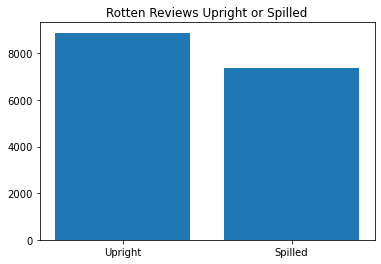

In [107]:
Upright = r_movies_info_c2.audience_upright.value_counts()
filled = lambda x: 'Upright' if x == 1 else "Spilled"
plt.bar([filled(x) for x in Upright.index], Upright.values)
plt.title('Rotten Reviews Upright or Spilled');

In [12]:
r_ratings_upright = r_movies_info_c2.loc[r_movies_info_c2["audience_upright"] == 1]

In [47]:
df_production = r_ratings_upright["production_company"].str.split('/',n = 3, expand = True)
df_production.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 1 to 17711
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8892 non-null   object
 1   1       153 non-null    object
 2   2       3 non-null      object
dtypes: object(3)
memory usage: 277.9+ KB


In [77]:
#df_production.loc[(df_production[1] != "None") & (df_production[2] != "None")]
#df_production.dropna()
df_production_solo = df_production.loc[(~df_production[0].index.isin(df_production[1].dropna().index)) & (~df_production[0].index.isin(df_production[2].dropna().index)), [0]]

In [108]:
# finding all the solo production company ratings
df_production_solo = df_production.loc[(~df_production[0].index.isin(df_production[1].dropna().index)) & (~df_production[0].index.isin(df_production[2].dropna().index)), [0]]
pc_names = df_production_solo[0].unique().tolist()
r_solopc = r_movies_info_c2.loc[r_movies_info_c2["production_company"].isin(pc_names)]

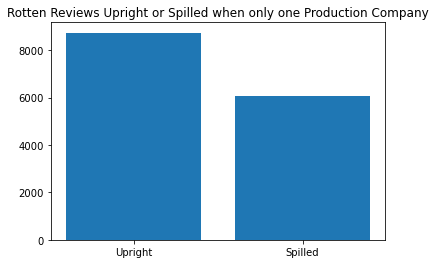

In [117]:
#Does being a solo company mean more to the audience Upright counter
Upright_solo = r_solopc.audience_upright.value_counts()
filled_solo = lambda x: 'Upright' if x == 1 else "Spilled"
plt.bar([filled_solo(x) for x in Upright_solo.index], Upright_solo.values)
plt.title('Rotten Reviews Upright or Spilled when only one Production Company');

In [138]:
r_solopc_average = r_solopc.groupby(["production_company"]).mean()

In [141]:
r_solopc_average["audience_rating"]

production_company
10 West Studios                    68.000000
1091                               72.500000
1428 Films                         73.000000
20th Century Fox                   60.872818
20th Century Fox Distribution      64.000000
                                     ...    
cinTBLAST!                         64.000000
eOne Entertainment Distribution    81.000000
eRealBiz                           70.000000
levelFILM                          54.500000
s                                  62.666667
Name: audience_rating, Length: 1724, dtype: float64

In [150]:
r_solopc["movie_title"].apply(lambda x: x.replace(","))

0        Percy Jackson & the Olympians: The Lightning T...
1                                              Please Give
3                          12 Angry Men (Twelve Angry Men)
4                             20,000 Leagues Under The Sea
5                                              10,000 B.C.
                               ...                        
17707                                            Zoot Suit
17708                                             Zootopia
17709                                      Zorba the Greek
17710                                                 Zulu
17711                                            Zulu Dawn
Name: movie_title, Length: 14792, dtype: object

In [148]:
conn = sqlite3.connect('Prebuilt_stuff\data\movies.db')
df_movie_budgets = pd.read_sql('''
SELECT movie
FROM tn_movie_budgets
''', conn)

In [149]:
df_movie_budgets

,movie
0,Avatar
1,Pirates of the Caribbean: On Stranger Tides
2,Dark Phoenix
3,Avengers: Age of Ultron
4,Star Wars Ep. VIII: The Last Jedi
...,...
5777,Red 11
5778,Following
5779,Return to the Land of Wonders
5780,A Plague So Pleasant
